In [93]:
from numpy import *
import operator

def createDataSet() :
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    label = ['A', 'A', 'B', 'B']
    return group, label

#(TestintData, TrainingData, Label, K)
def classify0(intX, dataSet, labels, k) :
    #整理数据
    #
    dataSetSize = dataSet.shape[0]
    #将TestingData向量扩充成TrainingData同维矩阵
    intXMat = tile(intX, (dataSetSize, 1))
    
    #求距离
    #
    #求TestingData和TrainingData的差, 为了求距离
    diffMat = intXMat - dataSet
    #差平方
    sqDiffMat = diffMat**2
    #求距离
    sqDistance = sqDiffMat.sum(axis=1)
    #为了严谨, 开方
    distance = sqDistance**0.5
    
    #返回结果
    #
    #取得按距离排序后TrainingData的Key, 为了方便取的Label
    sortedDistanceIndecis = distance.argsort()
    classCount = {}
    for i in range(k) :
        label = labels[sortedDistanceIndecis[i]]
        classCount[label] = classCount.get(label, 0) + 1
        
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

def file2matrix(filename) : 
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = zeros((numberOfLines, 3))

    classLabelVector = []
    index = 0
    for line in arrayOfLines :
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(convert(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector
    #print(listFromLine[0:3])

    
def convert(str_label) :
    if str_label == 'largeDoses' :
        return 10
    elif str_label == 'smallDoses' :
        return 5
    elif str_label == 'didntLike' :
        return 1
    else :
        return 0

def autoNorm(dataSet) :
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals
    

def datingClassTest() :
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs) :
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print(classifierResult, datingLabels[i])
        if(classifierResult != datingLabels[i]) :
            errorCount += 1
    return errorCount / numTestVecs
    
#data, label = createDataSet()
#classify0([1,2], data, label , 2)

error = datingClassTest()
print(error)

#datingDataMat, datingDataMatLabel = file2matrix('datingTestSet.txt')
#normDataSet, ranges, minVals = autoNorm(datingDataMat)
#normDataSet


10 10
5 5
1 1
1 1
1 1
1 1
10 10
10 10
1 1
10 10
1 1
1 1
5 5
1 1
1 1
1 1
1 1
1 1
5 5
10 10
5 5
1 1
10 5
10 10
5 5
10 10
5 5
10 10
5 5
1 1
10 10
1 1
10 10
1 1
5 5
1 1
1 1
5 5
10 10
10 10
1 1
5 5
10 10
10 10
10 10
1 1
1 1
1 1
1 1
5 5
5 5
1 1
10 10
5 5
5 5
5 5
5 5
10 10
1 1
5 5
1 1
5 5
5 5
5 5
5 5
5 5
10 10
5 5
10 10
1 1
5 5
10 10
5 5
5 5
10 1
10 10
1 1
1 1
10 10
10 10
1 1
5 5
10 10
10 1
10 10
1 1
5 5
5 5
1 1
1 1
10 10
5 10
1 1
5 5
1 1
10 10
10 10
5 5
1 1
10 1
0.05


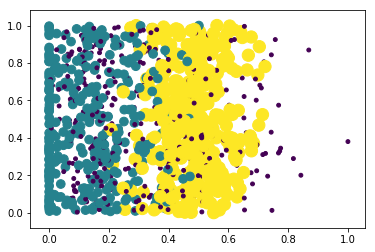

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(normDataSet[:,1], normDataSet[:,2], 15.0*array(datingDataMatLabel), 15.0*array(datingDataMatLabel))
plt.show()